In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

fc = pd.read_csv('data/forecast.csv')
tf2Key = pd.read_csv('data/tf2Key.csv')

#
fc = fc[['.mean','.model']]

fc = fc.rename(columns={'.mean': 'price', '.model': 'date'})
fc['date'] = pd.to_datetime(fc['date'])
tf2Key = tf2Key[['dates','avgVal']]

tf2Key['dates'] = pd.to_datetime(tf2Key['dates'])
tf2Key = tf2Key.rename(columns={'dates': 'date', 'avgVal': 'price'}) 
tf2Key.dropna(inplace=True)  

fc = pd.concat([tf2Key,fc], axis=0)

C:\Users\emant\AppData\Local\Temp\ipykernel_8568\3048099115.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fc['date'] = pd.to_datetime(fc['date'])


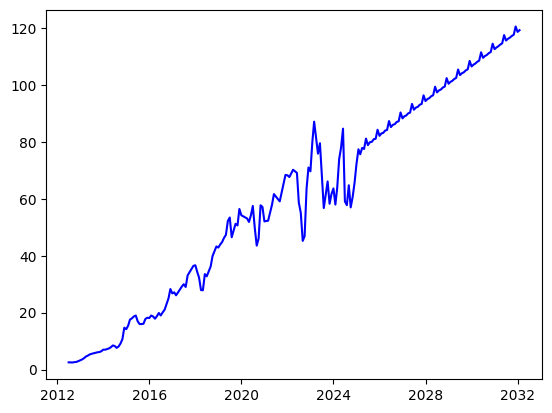

In [14]:
plt.plot(fc['date'], fc['price'], c='blue', label='Forecast')
plt.show()

In [ ]:
fc.to_csv('data/graph.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

df = fc.copy()
# Find the first point where price reaches or exceeds 100
df_forecast = df[df['price'] >= 100]
special_point = df_forecast.iloc[0] if not df_forecast.empty else None

# Create the basic time series trace
trace_main = go.Scatter(
    x=df['date'],
    y=df['price'],
    mode='lines+markers',
    name='',
    hovertemplate='Date: %{x|%b %Y}<br>Price: %{y:.2f}',
)

# Add a special point with a custom tooltip if applicable
trace_special = go.Scatter()
if special_point is not None:
    trace_special = go.Scatter(
        x=[special_point['date']],
        y=[special_point['price']],
        mode='markers',
        name='Forecast = 100',
        marker=dict(color='red', size=10),
        hovertemplate='Forecast hits 100<br>Date: %{x|%b %Y}<br>Price: %{y:.2f}',
    )

# Combine and layout
fig = go.Figure([trace_main, trace_special])
fig.update_layout(
    title='Tf2 Key Price Forecast in Refined Metal',
    xaxis_title='Date',
    yaxis_title='Price (in Refined Metal)',
    legend_title='',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
    ),
    hovermode='x unified',
)
fig.update_layout(template="seaborn")

# Save as interactive HTML
output_path = "index.html"
fig.write_html(output_path,include_plotlyjs='cdn')

output_path


'sample_forecast_interactive.html'